1.  Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
    zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
    ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
    
    Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
    (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
    Произвести расчет как с использованием intercept, так и без.

In [2]:
import numpy as np

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [4]:
b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)

In [5]:
b

2.620538882402765

In [6]:
#2d way

n=10

In [7]:
b1 = (n*(np.sum(zp*ks)) - (np.sum(zp)*np.sum(ks)))/(n*(np.sum(zp**2))-((np.sum(zp)**2)))

In [8]:
b1

2.6205388824027653

In [9]:
a = np.mean(ks)-b*np.mean(zp)

In [10]:
a

444.1773573243596

In [11]:
y_hat = 444.18 + 2.62*zp

In [12]:
y_hat

array([535.88, 562.08, 941.98, 968.18, 548.98, 627.58, 585.66, 837.18,
       758.58, 732.38])

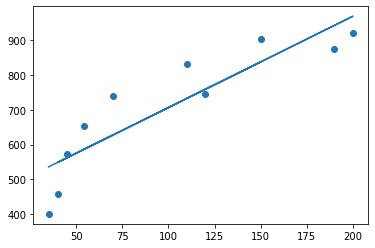

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zp, ks)
plt.plot(zp, 444.18 + 2.62*zp)
plt.show()

In [14]:
#функция потерь

mse = ((ks-y_hat)**2).sum()/n

In [15]:
mse

6470.417919999998

In [16]:
import seaborn as sns

In [17]:
X = zp.reshape((10,1))

In [19]:
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [20]:
Y = ks.reshape((10,1))

In [21]:
Y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [22]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@Y)

In [23]:
B

array([[5.88982042]])

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).


In [24]:
def mse(B1, y=Y, X=X, n=10):
    return np.sum((B1*X-y))**2/n

In [158]:
alpha = 1e-6

In [159]:
alpha

1e-06

In [160]:
B1=0.1

In [161]:
n=10

In [162]:
zp

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [163]:
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [31]:
B1_plot=[]
mse_plot=[]
i_plot=[]

for i in range(1000):
    B1 -= alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    B1_plot.append(B1)
    mse_plot.append(mse(B1))
    i_plot.append(i)
    if i % 10 == 0:
        print('B1={B1},mse={mse}'.format(i=i,B1=B1,mse=mse(B1)))

B1=0.25952808,mse=4672868.836557692
B1=1.6319792141937546,mse=2963902.0490235994
B1=2.6698789606516935,mse=1928740.424075627
B1=3.4547782236263824,mse=1293017.2326958016
B1=4.04834889855975,mse=896388.1611224925
B1=4.497229618367758,mse=644555.1986316771
B1=4.836690291080364,mse=481625.18000471697
B1=5.093403362579137,mse=374147.3898168932
B1=5.287539550879594,mse=301868.00157817255
B1=5.434352720103083,mse=252354.3022348999
B1=5.54537842245223,mse=217853.54976661596
B1=5.629340281237233,mse=193446.08151390357
B1=5.692835432193034,mse=175950.9056003361
B1=5.740852880272922,mse=163270.94090990257
B1=5.777165500770666,mse=153996.7282365697
B1=5.804626485478126,mse=147163.28241024847
B1=5.825393526544474,mse=142098.5500973364
B1=5.8410983528369655,mse=138327.3003509411
B1=5.852974939784972,mse=135509.01879005184
B1=5.861956466540286,mse=133396.9890733187
B1=5.868748638669329,mse=131810.8077273557
B1=5.873885137561711,mse=130617.5769878702
B1=5.877769553381888,mse=129718.81342016591
B1=5.8

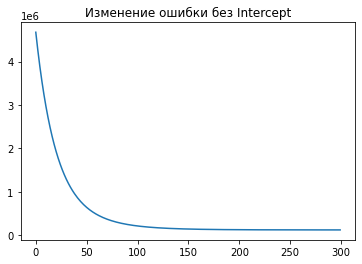

In [32]:
plt.plot(i_plot[:300], mse_plot[:300])
plt.title('Изменение ошибки без Intercept')
plt.show()

*3. Произвести вычисления как в пункте 2, но с вычислением intercept. 
    Учесть, что изменение коэффициентов должно 
    производиться на каждом шаге одновременно
    (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [164]:
def mse_inter(B1,B0, y=Y, X=X, n=10):
    return np.sum((B1*X+B0-y))**2/n

In [165]:
B1_inter_plot=[]
mse_inter_plot=[]
i_inter_plot=[]
inter_inter_plot=[]
B1=0.1
B0=1000
beta=0.4
for i in range(200):
    B1 -= alpha*(2/n)*np.sum((B1*zp-ks)*zp)
    B1_inter_plot.append(B1)
    B0 -= beta*(2/n)*np.sum((B1*zp+B0-ks)*1)
    mse_inter_plot.append(mse_inter(B1,B0))
    i_inter_plot.append(i)
    inter_inter_plot.append(B0)
    print('B1={B1},B0={B0},mse={mse}'.format(i=i,B1=B1,B0=B0,mse=mse_inter(B1,B0)))

B1=0.25952808,B0=746.8670821503999,mse=40047.671311907645
B1=0.414660650906144,B0=683.6561444285736,mse=2497.264154795388
B1=0.5655188230595969,B0=658.7763419591203,mse=386.87785682438994
B1=0.7122203698240712,B0=641.8999519916954,mse=178.0078364578738
B1=0.8548798195302346,B0=626.9521394380464,mse=139.6481875868876
B1=0.9936085448867542,B0=612.7089027263958,mse=126.79362001506908
B1=1.1285148499277806,B0=598.9166559191376,mse=118.89129499520247
B1=1.2597040545647504,B0=585.516138277535,mse=112.23367066431668
B1=1.387278576808517,B0=572.4871895048001,mse=106.09594132659291
B1=1.5113380127259965,B0=559.8176983086272,mse=100.32250448119106
B1=1.6319792141937546,B0=547.4973858063281,mse=94.86881259644588
B1=1.7492963645092312,B0=535.5165560722768,mse=89.7126756977049
B1=1.8633810519186353,B0=523.8658402828156,mse=84.83698650424728
B1=1.9743223411189108,B0=512.5361397449971,mse=80.22632142290247
B1=2.082206842789593,B0=501.51860886190764,mse=75.86624172489385
B1=2.187118781208843,B0=490.80

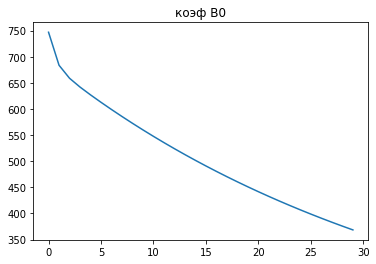

In [166]:

plt.plot(i_inter_plot[:30],inter_inter_plot[:30])
plt.title('коэф B0')
plt.show()

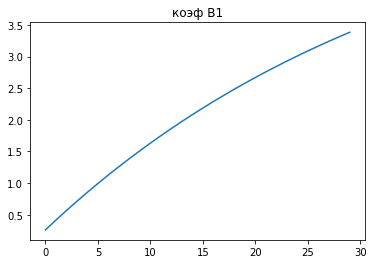

In [167]:
plt.plot(i_inter_plot[:30],B1_inter_plot[:30])
plt.title('коэф B1')
plt.show()

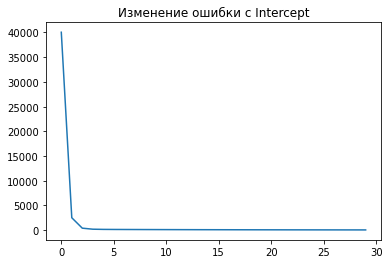

In [168]:

plt.plot(i_inter_plot[:30], mse_inter_plot[:30])
plt.title('Изменение ошибки с Intercept')
plt.show()